In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# get working directory and remove last folder
# TODO: make this more robust
wd = os.path.dirname(os.getcwd())
os.chdir(wd)
print("Working Directory: ", os.getcwd())

# the working directory should be .../student-performance

Working Directory:  /Users/marvin/workspace/kaggle_gameplay/student-performance


Accuracy: 0.728


<Axes: >

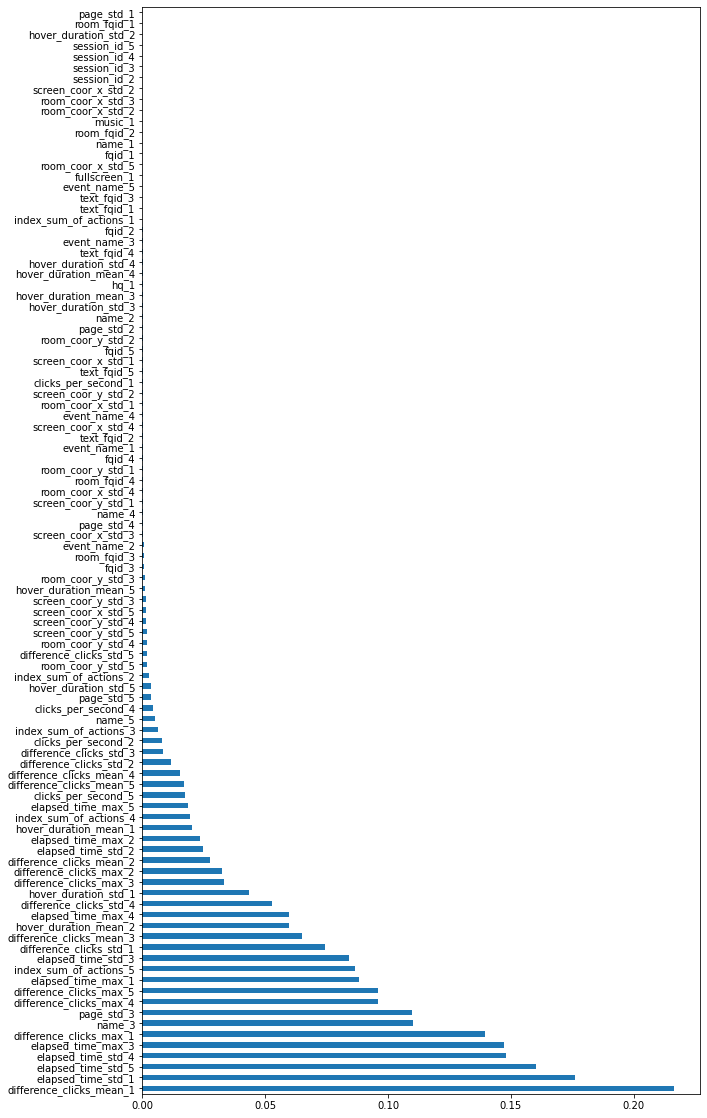

In [11]:
# X
df = pd.read_csv("data/processed/df_0_4_flattened.csv", index_col=0)
X = df.iloc[:, 2:].values
X = np.delete(X, 61, 1)

# y
labels = pd.read_csv("data/processed/labels.csv")
y = labels['correct'][labels['q'] == 1].values

# Creating training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
 
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

def f_importances(coef, names):
    imp = coef
    coef_sort = np.sort(coef)
    # imp, names = zip(*sorted(zip(imp,names)))
    print(imp)
    plt.plot(imp)

    # plt.barh(range(len(names)), imp, align='center')
    # plt.xticks(range(len(names)), names)
    plt.show()

features_names = df.columns[2:].to_list()
features_names.remove('clicks_per_second_3')
# f_importances(svm.coef_, features_names)
coef = svm.coef_[0]

pd.Series(abs(coef), index=features_names).nlargest(100).plot(kind='barh', figsize=(10, 20))


# Accuracy [2:10]: 0.728
# Accuracy [2:60]: 0.728
# Accuracy [2:] + no 63: 0.728

In [ ]:
len(coef[coef > 0.0])

array([3.54395404e-06, 7.04486855e-06, 4.86832796e-14, 1.84335186e-13])

In [4]:
df = pd.read_csv("data/processed/df_0_4_flattened.csv", index_col=0)
df.head()

,session_id_1,level_group_1,event_name_1,name_1,fqid_1,room_fqid_1,text_fqid_1,fullscreen_1,hq_1,music_1,...,room_coor_x_std_5,room_coor_y_std_5,screen_coor_x_std_5,screen_coor_y_std_5,hover_duration_std_5,difference_clicks_std_5,index_sum_of_actions_5,difference_clicks_max_5,elapsed_time_max_5,clicks_per_second_5
0,20090312431273200,0-4,6,3,5,1,6,0,0,1,...,422.014526,41.143421,181.938446,39.566540,164.755875,8.380692,13.0,30.837000,38.620998,0.336604
1,20090312433251036,0-4,5,3,4,1,4,0,0,0,...,352.261993,63.718025,181.674881,68.807640,-1.000000,10.578836,12.0,37.409000,47.641998,0.251879
2,20090312455206810,0-4,5,3,4,1,4,1,1,1,...,284.153931,34.723782,197.985825,54.664265,-1.000000,7.594211,14.0,28.743999,40.616001,0.344692
3,20090313091715820,0-4,5,3,4,1,4,1,1,1,...,337.755798,117.306465,187.151123,129.229507,-1.000000,12.563816,14.0,47.848999,60.853001,0.230063
4,20090313571836404,0-4,5,3,5,1,6,0,0,1,...,395.347290,57.395401,155.039871,56.676224,625.082397,9.021479,12.0,31.920000,41.750999,0.287418


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23562 entries, 0 to 23561
Columns: 104 entries, session_id_1 to clicks_per_second_5
dtypes: float64(70), int64(33), object(1)
memory usage: 18.9+ MB


In [6]:
pd.set_option('display.max_columns', None)
print(df.describe())

       session_id_1  event_name_1        name_1        fqid_1  room_fqid_1   
count  2.356200e+04  23562.000000  23562.000000  23562.000000      23562.0  \
mean   2.113666e+16      5.763815      2.999958      4.874374          1.0   
std    5.704122e+14      0.711001      0.006515      0.833546          0.0   
min    2.009031e+16      3.000000      2.000000      1.000000          1.0   
25%    2.101031e+16      5.000000      3.000000      4.000000          1.0   
50%    2.104022e+16      6.000000      3.000000      5.000000          1.0   
75%    2.110061e+16      6.000000      3.000000      5.000000          1.0   
max    2.210022e+16      7.000000      3.000000      7.000000          1.0   

        text_fqid_1  fullscreen_1          hq_1       music_1   
count  23562.000000  23562.000000  23562.000000  23562.000000  \
mean       5.129021      0.138783      0.120278      0.926449   
std        1.051692      0.345727      0.325294      0.261044   
min        1.000000      0.000000    

In [7]:
dt = df.dtypes.to_dict()
for d in dt:
    print(d, dt[d])

session_id_1 int64
level_group_1 object
event_name_1 int64
name_1 int64
fqid_1 int64
room_fqid_1 int64
text_fqid_1 int64
fullscreen_1 int64
hq_1 int64
music_1 int64
hover_duration_mean_1 float64
difference_clicks_mean_1 float64
elapsed_time_std_1 float64
page_std_1 float64
room_coor_x_std_1 float64
room_coor_y_std_1 float64
screen_coor_x_std_1 float64
screen_coor_y_std_1 float64
hover_duration_std_1 float64
difference_clicks_std_1 float64
index_sum_of_actions_1 float64
difference_clicks_max_1 float64
elapsed_time_max_1 float64
clicks_per_second_1 float64
session_id_2 int64
event_name_2 int64
name_2 int64
fqid_2 int64
room_fqid_2 int64
text_fqid_2 int64
hover_duration_mean_2 float64
difference_clicks_mean_2 float64
elapsed_time_std_2 float64
page_std_2 float64
room_coor_x_std_2 float64
room_coor_y_std_2 float64
screen_coor_x_std_2 float64
screen_coor_y_std_2 float64
hover_duration_std_2 float64
difference_clicks_std_2 float64
index_sum_of_actions_2 float64
difference_clicks_max_2 float6

In [8]:
# df.iloc[13618, 63] = 0
# df.iloc[13618, 63]

In [9]:
X = df.iloc[:, 2:].values
# remove column 61
# X = np.delete(X, 61, 1)
print(type(X))
print(X.shape)
print(X)
# X = X.astype(np.float64)
X.dtype


# 63 is making problems: too large for float64

<class 'numpy.ndarray'>
(23562, 102)
[[ 6.          3.          5.         ... 30.83699989 38.62099838
   0.33660445]
 [ 5.          3.          4.         ... 37.4090004  47.64199829
   0.25187859]
 [ 5.          3.          4.         ... 28.74399948 40.61600113
   0.34469175]
 ...
 [ 5.          3.          5.         ... 40.4109993  55.32099915
   0.18076319]
 [ 7.          3.          6.         ... 38.57500076 49.98500061
   0.42012605]
 [ 7.          3.          6.         ... 78.81700134 91.91000366
   0.21760418]]


dtype('float64')

In [10]:
labels = pd.read_csv("data/processed/labels.csv")
labels.head()


,session,correct,q
0,20090312431273200,1,1
1,20090312433251036,0,1
2,20090312455206810,1,1
3,20090313091715820,0,1
4,20090313571836404,1,1


In [11]:
print(labels.shape)
labels.info()

(424116, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   session  424116 non-null  int64
 1   correct  424116 non-null  int64
 2   q        424116 non-null  int64
dtypes: int64(3)
memory usage: 9.7 MB


In [31]:
# y = labels[(labels['q'] >= 0) & (labels['q'] <= 3)]
y = labels['correct'][labels['q'] == 1].values
print(y.shape)
print(y)

(23562,)
[1 0 1 ... 1 0 0]


In [26]:
for i in range(2,101):
    try:
        X = df.iloc[:, i:i+1].values
        # Creating training and test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
        
        # Feature Scaling
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
    except Exception as e: 
        print(f"The index {i} does not work.")
        print(e)
        

The index 63 does not work.
Input X contains infinity or a value too large for dtype('float64').


In [59]:
df.columns[63]

'clicks_per_second_3'

In [61]:
col = df.iloc[:, 63].values
col.dtype

dtype('float64')

In [15]:
np.min(df['clicks_per_second_3'])

9.303585102315992e-05

In [16]:
np.max(df['clicks_per_second_3'])

inf

In [18]:
any(np.isinf(df['clicks_per_second_3']))

True

In [30]:
col = df['clicks_per_second_3'].values
print(np.max(col))
print(any(np.isinf(col)))
for i, x in enumerate(col):
    if np.isinf(x) == True:
        print(i)
        print(x)

inf
True
6996
inf


In [29]:
col = df['clicks_per_second_3'].values
for i in range(len(col)):
    if np.isinf(col[i]) == True:
        print(col[i])
    if np.isnan(col[i]) == True:
        print(col[i])
    if len(str(col[i])) > 18:
        print(str(col[i]))
        print(i)
    if isinstance(col[i], np.float64) == False:
        print("This index is not a float64: ", i)
        print(col[i])



inf
9.303585102315992e-05
13618
